# Training of a Serial Quantum Fourier model
Tested with: qiskit 1.2.4, qiskit-machine-learning 0.8.1 - Success<br>
Tested with: qiskit 1.4.4, qiskit-machine-learning 0.8.3 - Success<br>
Tested with: qiskit 2.1.1, qiskit-machine-learning 0.8.3 - ML not yet compatible with Qiskit 2.0+

In [1]:
%%html
<style>
tr:nth-child(odd), tr:nth-child(even) {
  background-color: rgb(255, 255, 255);
}
th:nth-child(even),th:nth-child(odd),td:nth-child(even),td:nth-child(odd) {
  background-color: rgb(255, 255, 255);
}
table {float:left}
</style>

# Guest Lecture and Lab:<br>Simple QML models in Qiskit
<table>
    <tr><td style="vertical-align: top;"><strong>Aim</strong></td>
        <td>To explore the process of developing a simple <strong>Qiskit</strong> quantum model.<br/>
            To learn avoiding modeling pits and traps!</td></tr>
    <tr><td style="vertical-align: top;"><strong>Author</strong></td>
        <td>Jacob L. Cybulski (<a href="https://jacobcybulski.com/" target="_blank">website</a>),
            <em>Enquanted</em>, Australia</td></tr>
    <tr><td style="vertical-align: top;"><strong>Release</strong></td>
        <td>October 2022: Created<br>
            August 2025: Adopted for QBronze Workshop by QIndia</td></tr>
    <tr><td style="vertical-align: top;"><strong>Datasets</strong></td>
        <td>The following data sets have been included in your exercises.<br>
            <table style="float: left;">
                <tr><td><em><strong>sin_n100:</strong></em></td><td>$y = sin(x)$</td></tr>
                <tr><td><em><strong>sinful_n100:</strong></em></td><td>$y = sin(0.7 x+0.5\pi)$</td></tr>
                <tr><td><em><strong>sinless_n100:</strong></em></td><td>$y = sin(0.7 x+0.5\pi)$ (randomised)</td></tr>
                <tr><td><em><strong>mackie_glass_n100:</strong></em></td><td>$y = mackie\_glass()$</td></tr>
            </table>
        </td></tr>
    <tr><td style="vertical-align: top;"><strong>All<br>Exercises</strong></td>
        <td>Perform the following exercises using the indicated notebooks, data and models.<br>
            <table style="float: left;">
                <tr><th style="text-align: left;">Exercise</th><th style="text-align: left;">Time</th>
                    <th style="text-align: left;">Notebook</th><th style="text-align: left;">Dataset</th><th style="text-align: left;">Model</th></tr>
                <tr><td>01</td><td>15 mins</td><td>qml_abc_01_sin...</td><td>sin_n100</td><td>qnn_model_1</td></tr>
                <tr><td style="vertical-align: top;">02</td><td style="vertical-align: top;">60 mins</td>
                    <td style="vertical-align: top;">qml_abc_02_sinful...</td><td style="vertical-align: top;">sinful_n100<br>sinless_n100</td>
                    <td style="vertical-align: top;">qnn_model_2</td></tr>
                <tr><td>Challenge</td><td>unlimited</td><td>qml_abc_03_mglass...</td><td>mackie_glass</td><td>qnn_model_3</td></tr>
            </table>
        </td>
    </tr>
    <tr><td style="vertical-align: top;"><strong>Exercise 01</strong></td>
        <td>This notebook aims at the following tasks.
            <ol style="list-style-type: upper-alpha;">
            <li>Follow the instructor demonstration and step through the code.<br>
                Observe what problem is highlighted by the produced result.</li>
            <li>What can be done to fix the problem? Fix it!</li>
            <li>Can you improve the result by increasing training epochs?</li>
            <li>Can you improve the result by simplifying the model?<br>
                - Reducing the number of layers?<br>
                - Reducing the number of qubits?<br>
                - Reducing the rotations, e.g. to a single Rx, Ry or Rz rotation only?</li>
            <li>Can your model work with 1 qubit, 1 layer, and with either a single rotation,<br>
                or with all Rx, Ry and Rz rotations?<br>
                If not, why? If yes, at what level of performance and why?</li>
            </ol>
        </td>
    </tr>
    <tr><td style="vertical-align: top;"><strong>References</strong></td>
        <td>Some useful readings for this exercise:
        <ul>
            <li>Maria Schuld, Ryan Sweke, and Johannes Jakob Meyer. <br/>
                <a href="http://arxiv.org/abs/2008.08605" target="_blank">
            "The Effect of Data Encoding on the Expressive Power of Variational Quantum Machine Learning Models."</a> <br/>
            <em>Physical Review A 103</em>, no. 3 (March 24, 2021): 032430, Arxiv 2008.08605.</li>
            <li>Maria Schuld and Johannes Jakob Meyer, 
                <a href="https://pennylane.ai/qml/demos/tutorial_expressivity_fourier_series" target="_blank">
                    "Quantum models as Fourier series",</a><br><em>PennyLane</em>, November 6, 2024.</li>
        </ul></td>
    </tr>
    <tr><td style="vertical-align: top;"><strong>Note</strong></td>
        <td>When running this script, you may obtain slightly different results each time.</td></tr>
    <tr><td style="vertical-align: top;"><strong>License</strong></td>
        <td>This project is licensed under the <a href="./LICENSE" target="_blank">GNU General Public License v3</a>.<br>
            The GPLv3 license requires attribution for modifications and derivatives,<br>
            ensuring that users know which versions are changed and to protect the reputations of original authors.</td></tr>
    <tr><td style="vertical-align: top;"><strong>Changes</strong></td>
        <td>All significant changes to this code must be listed at the bottom of this notebook</td></tr>
</table>

In [2]:
import sys
sys.path.append('.')
sys.path.append('..')
sys.path

['/home/jacob/miniconda3/envs/qiskit2-gpu/lib/python311.zip',
 '/home/jacob/miniconda3/envs/qiskit2-gpu/lib/python3.11',
 '/home/jacob/miniconda3/envs/qiskit2-gpu/lib/python3.11/lib-dynload',
 '',
 '/home/jacob/miniconda3/envs/qiskit2-gpu/lib/python3.11/site-packages',
 '.',
 '..']

In [3]:
import os
import numpy as np
import pylab
import math
import time
import copy

from IPython.display import clear_output

from utils.Charts import plot_objfn_range, plot_curve
from utils.Charts import plot_train_and_test_data, multi_perform_plot

import matplotlib.pyplot as plt
from matplotlib import set_loglevel
%matplotlib inline

In [4]:
##### Libraries used in QTSA development

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, TwoLocal, ZFeatureMap, ZZFeatureMap
from qiskit.quantum_info import Statevector, SparsePauliOp

from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.optimizers import COBYLA, NELDER_MEAD, SPSA, L_BFGS_B, QNSPSA
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.gradients import ParamShiftEstimatorGradient
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.utils.loss_functions import L1Loss, L2Loss
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.circuit import Parameter

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
### Default seed
seed = 42

## Utils

In [6]:
##### Random seed generator
def rand_seed():
    t=time.time(); t = int((t-int(t))*10000)
    return t

In [7]:
##### Data scaler
def scale_values(x, new_min=0, new_max=1):
    scaler = MinMaxScaler(feature_range=(new_min, new_max))
    return scaler.fit_transform(x.reshape(-1, 1)).flatten()

## Prepare raw TS data

In [8]:
##### Data settings
samples_no = 100

In [9]:
##### Generate data set #1: sin_n100
DATA_NAME=f'sin_n{samples_no}'
X_raw = np.linspace(-2*np.pi, 2*np.pi, samples_no)
X_raw = X_raw.reshape((X_raw.shape[0], 1))
y_raw = np.sin(X_raw[:,0])*1.5

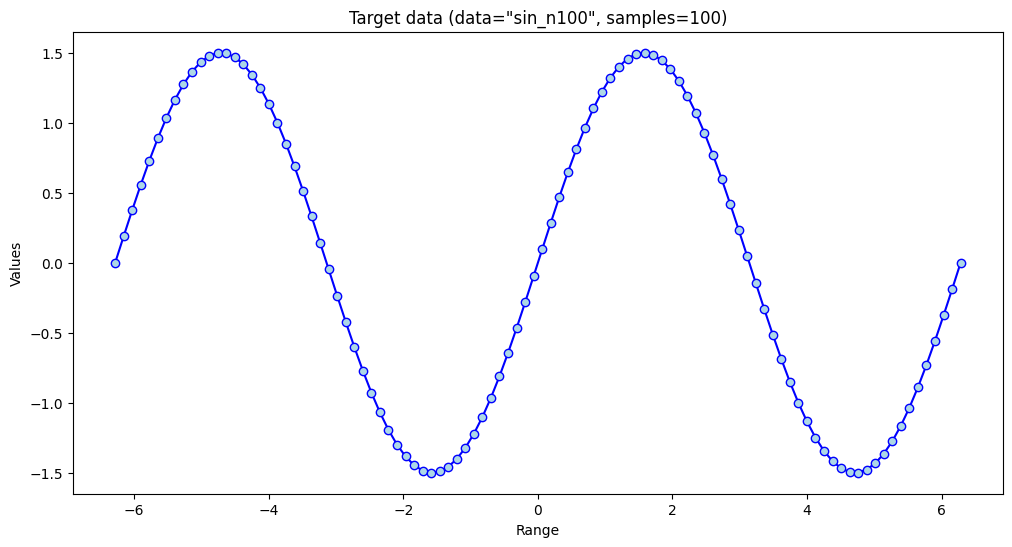

In [10]:
##### Show generated data
plot_curve(
    X_raw, y_raw, rcParams=(12, 6), dpi=100, col='blue', linestyle='solid',
    xlabel='Range', ylabel='Values', marker='o', mfc='lightblue',
    title=f'Target data (data="{DATA_NAME}", samples={samples_no})',
)

## Prepare data for encoding, training and testing
*In this demo we will not be scaling data back to their original values.*

In [11]:
##### Settings

### Data partition settings
samples_test_pc = 0.3

### Data encoding setting
x_from = -1                # in *pi
x_to =   1                 # in *pi
y_margin = 0.1
y_low = -1+y_margin
y_high = 1-y_margin

### Calculated values
samples_test_no = int(samples_no * samples_test_pc)
samples_train_no = samples_no - samples_test_no
(samples_train_no, samples_test_no)

(70, 30)

In [12]:
##### Prepare data for encoding
X = X_raw
X = X.reshape(X.shape[0], 1)
y = scale_values(y_raw, new_min=y_low, new_max=y_high)
(X.shape, y.shape)

((100, 1), (100,))

In [13]:
##### Split encoding data
X_train = X[0:samples_train_no]
X_test = X[samples_train_no:samples_train_no+samples_test_no]
y_train = y[0:samples_train_no]
y_test = y[samples_train_no:samples_train_no+samples_test_no]

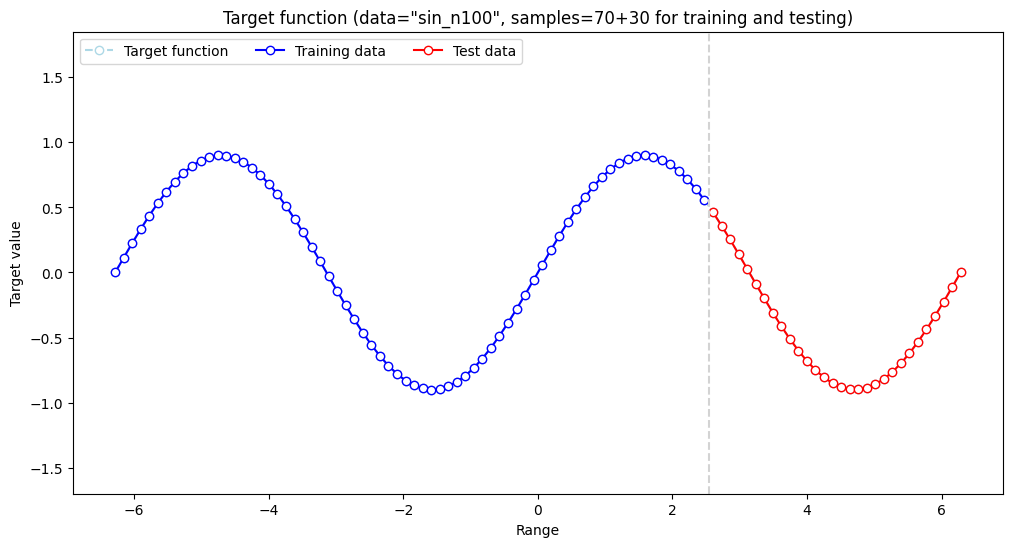

In [14]:
##### Plot encoding data
plot_train_and_test_data(
    X, y, X_train, y_train, X_test, y_test, marker='o',
    rcParams=(12, 6), dpi=100, ylim=(-1.7, 1.85),
    colors=['lightblue', 'blue', 'red', 'blue', 'red'], linestyles=['dashed', 'solid', 'solid'],
    title=f'Target function (data="{DATA_NAME}", samples={samples_train_no}+{samples_test_no} for training and testing)'
)

## Create a simple model to fit data

### Identify device and suitable primitives

In [15]:
##### Force CPU for this run
device = 'CPU'
print(f'Selected device: {device}')

Selected device: CPU


In [16]:
##### Create an estimator suitable for the device
estimator = StatevectorEstimator(seed=seed)

### Create a serial model and test it

ParameterView([])



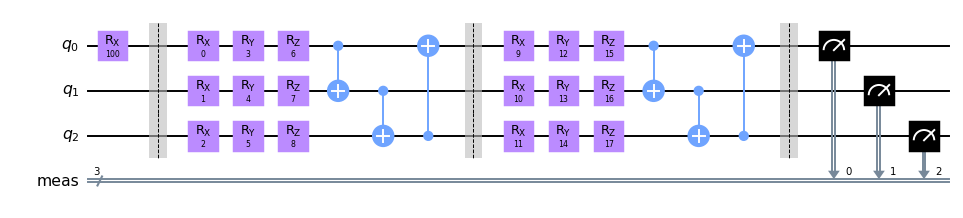

In [17]:
##### Model 1 - Single input
def qnn_model_1(qubits_no, layers_no, add_meas=False):
    qr = QuantumRegister(qubits_no, 'q')
    ansatz = QuantumCircuit(qr, name="ansatz")
    param_x = Parameter('X')
    ansatz.rx(param_x, 0)
    
    for l in range(layers_no):
        ansatz.barrier()
        for q in range(qubits_no):
            ansatz.rx(Parameter(f'P{l:02d}_A{q:02d}'), q)
            ansatz.ry(Parameter(f'P{l:02d}_B{q:02d}'), q)
            ansatz.rz(Parameter(f'P{l:02d}_C{q:02d}'), q)
        for q in range(qubits_no-1):
            ansatz.cx(q, q+1)
        if qubits_no > 1:
            ansatz.cx(qubits_no-1, 0)
    if add_meas:
        ansatz.measure_all()
    return ansatz

### Test model
m = qnn_model_1(3, 2, add_meas=True)
params = np.array([p for p in range(m.num_parameters-1)]+[100])
m = m.assign_parameters(params)

# Show all parameters, the last is X
print(m.parameters)
print()

# Show the circuit
m.draw(output='mpl', style='clifford', scale=0.7, fold=True);

ParameterView([])



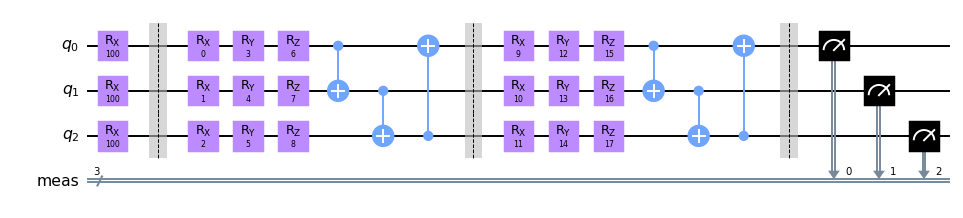

In [18]:
##### Model 2 - Parallel reuploading
def qnn_model_2(qubits_no, layers_no, add_meas=False):
    qr = QuantumRegister(qubits_no, 'q')
    ansatz = QuantumCircuit(qr, name="ansatz")
    param_x = Parameter('X')

    for q in range(qubits_no):
        ansatz.rx(param_x, q)
    
    for l in range(layers_no):
        ansatz.barrier()
        for q in range(qubits_no):
            ansatz.rx(Parameter(f'P{l:02d}_A{q:02d}'), q)
            ansatz.ry(Parameter(f'P{l:02d}_B{q:02d}'), q)
            ansatz.rz(Parameter(f'P{l:02d}_C{q:02d}'), q)
        for q in range(qubits_no-1):
            ansatz.cx(q, q+1)
        if qubits_no > 1:
            ansatz.cx(qubits_no-1, 0)
    if add_meas:
        ansatz.measure_all()
    return ansatz

### Test model
m = qnn_model_2(3, 2, add_meas=True)
params = np.array([p for p in range(m.num_parameters-1)]+[100])
m = m.assign_parameters(params)

# Show all parameters, the last is X
print(m.parameters)
print()

# Show the circuit
m.draw(output='mpl', style='clifford', scale=0.7, fold=True);

ParameterView([])



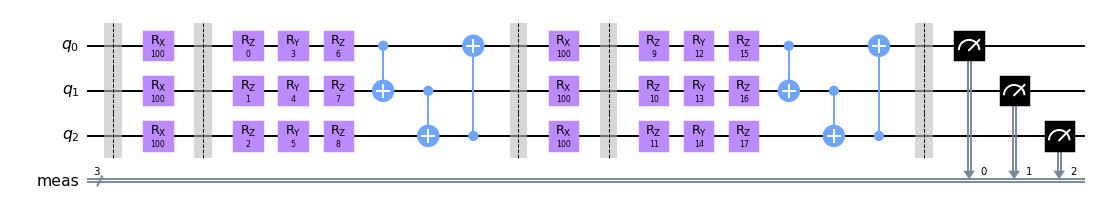

In [19]:
##### Model 3 - Reuploading in parallel and serially
def qnn_model_3(qubits_no, layers_no, add_meas=False):
    qr = QuantumRegister(qubits_no, 'q')
    ansatz = QuantumCircuit(qr, name="ansatz")
    param_x = Parameter('X')
    
    for l in range(layers_no):
        ansatz.barrier()
        for q in range(qubits_no):
            ansatz.rx(param_x, q)
        ansatz.barrier()
        for q in range(qubits_no):
            ansatz.rz(Parameter(f'P{l:02d}_A{q:02d}'), q)
            ansatz.ry(Parameter(f'P{l:02d}_B{q:02d}'), q)
            ansatz.rz(Parameter(f'P{l:02d}_C{q:02d}'), q)
        for q in range(qubits_no-1):
            ansatz.cx(q, q+1)
        if qubits_no > 1:
            ansatz.cx(qubits_no-1, 0)
    if add_meas:
        ansatz.measure_all()
    return ansatz

### Test model
m = qnn_model_3(3, 2, add_meas=True)
params = np.array([p for p in range(m.num_parameters-1)]+[100])
m = m.assign_parameters(params)

# Show all parameters, the last is X
print(m.parameters)
print()

# Show the circuit
m.draw(output='mpl', style='clifford', scale=0.7, fold=True);

## Train the model

In [20]:
##### Callback function use to collect training data

objfun_vals = []   # To store objective function values
params_vals = []   # To store parameter values

def create_callback(epochs, print_fract=0.1):
    
    global objfun_vals, params_vals
    objfun_vals = []
    params_vals = []
    elapsed = 0
    start_time = time.time()
    
    def callback_func(weights, obj_func_eval):
        nonlocal epochs, print_fract, start_time, elapsed
        global objfun_vals, params_vals

        iters = len(objfun_vals)
        objfun_vals.append(obj_func_eval)
        params_vals.append(weights)
        elapsed = time.time() - start_time
        time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))
        if (print_fract == 0) or (iters % int(print_fract*epochs) == 0):
            print(f"({time_str}) - Iter#: {iters:3d} / {epochs:3d}, "+\
                  f"Cost: {obj_func_eval:.6f}")
        
    return callback_func

In [21]:
##### Model settings for models with 1 input

inputs_no = 1         # Number of inputs
qubits_no = 3         # Number of qubits
layers_no = 4         # Number of layers
epochs = 300          # Training epochs
shots = 1000          # Ignored for statevector
print_fract = 0.1     # Frequency of training reporting 
weights_scaler = 1.00 # Scales weights

In [22]:
##### Select training components
#
#     Try an alternative optimiser, e.g. gradient based
#        optimizer = SPSA(maxiter=3*epochs, learning_rate=0.01, perturbation=0.01)
#
#     You can also play with:
#     - observables, 
#     - gradient
#     - estimator
#     - initialisation

### Select which model to use
mfun = qnn_model_1

### Select the loss function (here, MSE cost)
loss_fun = L2Loss()

### Select the optimiser (here, non-gradient based)
optimizer = COBYLA(maxiter=epochs)

In [23]:
##### Create amd train the QML model

start = time.time()
elapsed = time.time() - start
time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))

### Start a random process
algorithm_globals.random_seed = seed
np.random.seed(seed)

### Create and initialise a quantum model
model = mfun(qubits_no, layers_no)
init_weights = weights_scaler * 2 * np.pi * \
    algorithm_globals.random.random(model.num_parameters-inputs_no)

### Define a QNN estimator

obs = SparsePauliOp.from_list([("Z" * model.num_qubits, 1)]) 
estimator = StatevectorEstimator(seed=seed)
regr_qnn = EstimatorQNN(
    circuit=model,
    input_params=[model.parameters[-inputs_no]],
    weight_params=model.parameters[:-inputs_no],
    observables=obs,
    estimator=estimator, 
    gradient=ParamShiftEstimatorGradient(estimator),
)

### Define and fit regressor

regr_callback = create_callback(epochs, print_fract=print_fract)

regressor = NeuralNetworkRegressor(
    neural_network=regr_qnn,
    loss=loss_fun,
    optimizer=optimizer, 
    initial_point=init_weights, 
    callback=regr_callback
)

### Train the model
print(f'\nModel training started\n')

regressor.fit(X_train, y_train) 
elapsed = time.time() - start
time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))

### Retrieve training cost and params as arrays
objfun_vals = np.array(objfun_vals)
params_vals = np.array(params_vals)

### Total time  
print(f'\nTotal time {time_str}, min Cost={min(objfun_vals):0.6f}')


Model training started

(00:00:00) - Iter#:   0 / 300, Cost: 0.438667
(00:00:01) - Iter#:  30 / 300, Cost: 0.138567
(00:00:03) - Iter#:  60 / 300, Cost: 0.316108
(00:00:05) - Iter#:  90 / 300, Cost: 0.031687
(00:00:07) - Iter#: 120 / 300, Cost: 0.003664
(00:00:09) - Iter#: 150 / 300, Cost: 0.000878
(00:00:11) - Iter#: 180 / 300, Cost: 0.000298
(00:00:13) - Iter#: 210 / 300, Cost: 0.000226
(00:00:15) - Iter#: 240 / 300, Cost: 0.000164
(00:00:17) - Iter#: 270 / 300, Cost: 0.000151

Total time 00:00:19, min Cost=0.000145


## Report training performance

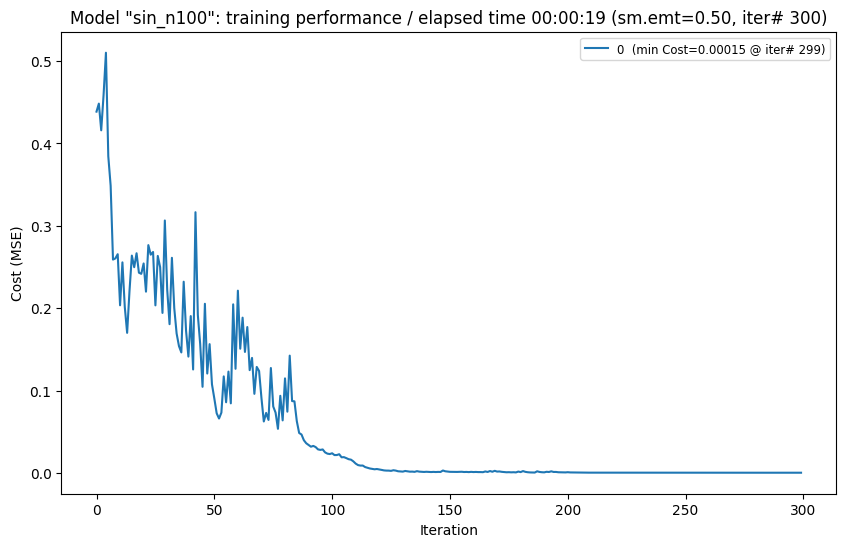

In [24]:
##### Plot all trained instances
multi_perform_plot([objfun_vals], smooth_weight=0.5, opt_format='0.5f',
    rcParams=(10, 6), dpi=100, meas_type=f'Cost', ylabel=f'Cost (MSE)',
    title=f'Model "{DATA_NAME}": training performance / elapsed time {time_str}'
    )

## Score the model

In [25]:
##### Calculate the scores

min_test_mse = np.inf
min_test_mse_idx = 0

### Collect all instance data
start = time.time()

### Start a random process
algorithm_globals.random_seed = seed
np.random.seed(seed)

### Init predictions
train_preds = []
test_preds = []

### Init scores
train_mse_scores = []
test_mse_scores = []

### Score calculation and collection
start = time.time()
iters = 0
print(f'\nCalculating model scores\n')

for param_no in range(params_vals.shape[0]):
    
    # Define model, its parameters and their values
    model = mfun(qubits_no, layers_no)
    obs = SparsePauliOp.from_list([("Z" * model.num_qubits, 1)]) 
    sel_weights = params_vals[param_no]
    estimator = StatevectorEstimator(seed=seed)
    
    sample_qnn = EstimatorQNN(
        circuit=model,
        input_params=[model.parameters[-inputs_no]],
        weight_params=model.parameters[:-inputs_no],
        observables=obs,
        estimator=estimator,
        gradient=ParamShiftEstimatorGradient(estimator),
    )
    
    # Calculate results
    y_train_hat = sample_qnn.forward(X_train, sel_weights)
    y_test_hat = sample_qnn.forward(X_test, sel_weights)
        
    # Score results
    train_mse = mean_squared_error(y_train, y_train_hat)
    test_mse = mean_squared_error(y_test, y_test_hat)

    # Add predictions to their lists
    train_preds.append(y_train_hat.flatten())
    test_preds.append(y_test_hat.flatten())

    # Add scores to their lists
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

    # Feedback
    if (print_fract == 0) or (iters % int(print_fract*epochs) == 0):
        print(f'Iter#: {iters:3d} / {epochs:3d}, '+
              f'MSE train: {train_mse:.6f}, test: {test_mse:.6f}')
    iters += 1

elapsed = time.time() - start
print(f'\nCompleted (time: {elapsed:0.2f} secs)\n')


Calculating model scores

Iter#:   0 / 300, MSE train: 0.438667, test: 0.737786
Iter#:  30 / 300, MSE train: 0.138567, test: 0.140680
Iter#:  60 / 300, MSE train: 0.316108, test: 0.139582
Iter#:  90 / 300, MSE train: 0.031687, test: 0.028190
Iter#: 120 / 300, MSE train: 0.003664, test: 0.002632
Iter#: 150 / 300, MSE train: 0.000878, test: 0.001388
Iter#: 180 / 300, MSE train: 0.000298, test: 0.000422
Iter#: 210 / 300, MSE train: 0.000226, test: 0.000274
Iter#: 240 / 300, MSE train: 0.000164, test: 0.000176
Iter#: 270 / 300, MSE train: 0.000151, test: 0.000152

Completed (time: 27.76 secs)



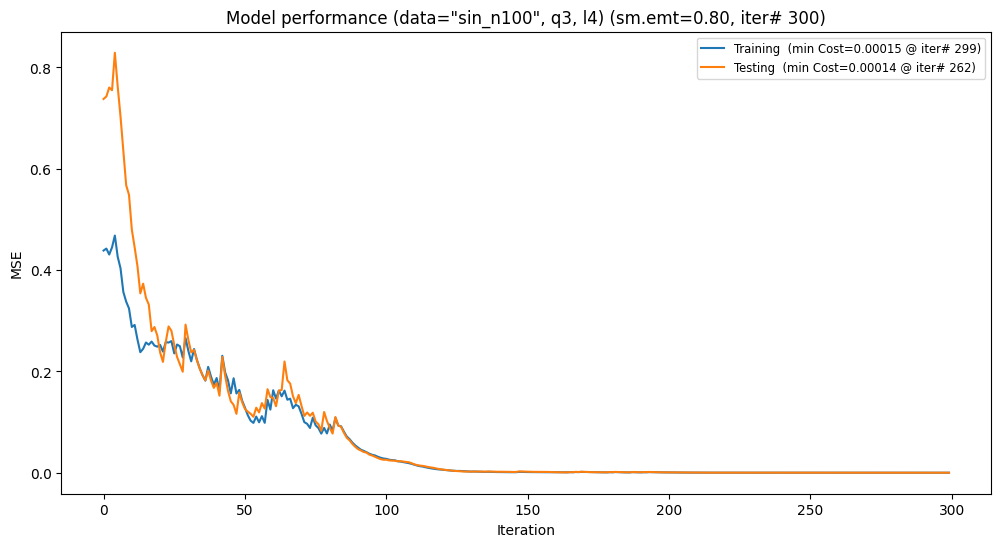

In [26]:
##### Plot training and test performance
multi_perform_plot([train_mse_scores, test_mse_scores], 
    rcParams=(12, 6), dpi=100, ylabel=f'MSE', smooth_weight=0.8, opt_format='0.5f',
    title=f'Model performance (data="{DATA_NAME}", q{qubits_no}, l{layers_no})', 
    labels=['Training', 'Testing']
    )

## Model fit

In [27]:
##### Find the best MSE in training and testing

train_params_no = int(np.argmin(train_mse_scores))
test_params_no =  int(np.argmin(test_mse_scores))
train_mse = train_mse_scores[train_params_no]
test_mse = test_mse_scores[test_params_no]

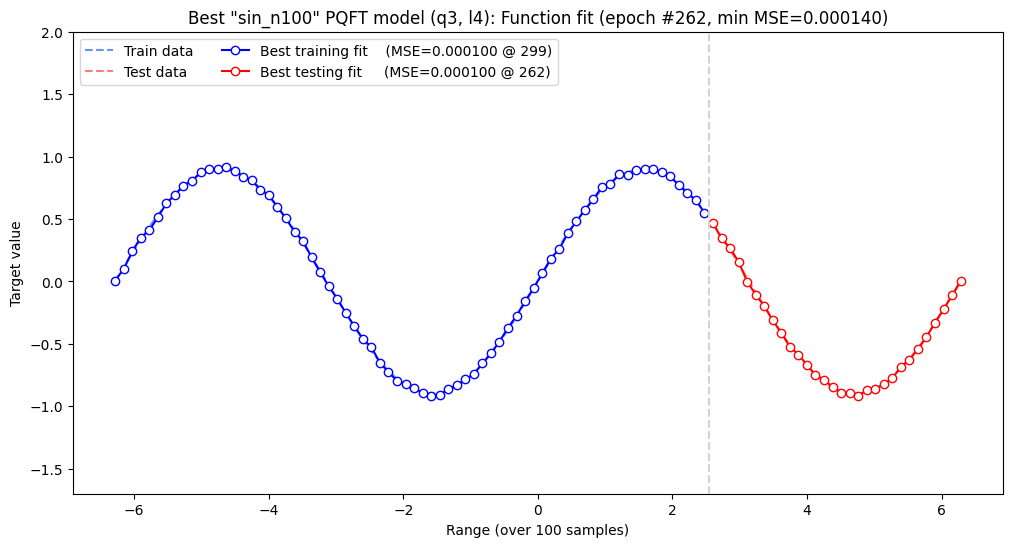

In [28]:
##### Plot trainig and test data partitions

y_train_hat = train_preds[train_params_no]
y_test_hat = test_preds[test_params_no]

train_test_title = \
    f'Best "{DATA_NAME}" PQFT model (q{qubits_no}, l{layers_no}): '+\
    f'Function fit (epoch #{test_params_no}, '+\
    f'min MSE={test_mse:0.6f})'
plot_train_and_test_data(
    X, y, X_train, y_train, X_test, y_test, y_train_hat, y_test_hat,
    colors=['orange', 'cornflowerblue', 'salmon', 'blue', 'red'], 
    linestyles=['none', 'dashed', 'dashed', 'solid', 'solid'],
    markers=['none', 'none', 'none', 'o', 'o'], ylim=(-1.7, 2), 
    xlabel=f'Range (over {samples_no} samples)', legend_cols=2, 
    title=train_test_title,
    labels=['Fun', 'Train data', 'Test data', 
        f'{"Best training fit":20} (MSE={np.round(train_mse, 4):0.6f} @ {train_params_no})', 
        f'{"Best testing fit":20} (MSE={np.round(test_mse, 4):0.6f} @ {test_params_no})'],
    rcParams=(12, 6), dpi=100
)

## Write your observations as related to the notebook tasks

- Task A:
- Task B: 
- Task C:
- Task D:
- Task E:
- Task F:
- Task G:
- Challenge:
- Reflection:

## System (Linux)

In [29]:
import sys
print(f'\nEnvironment:\n\n{sys.prefix}\n')


Environment:

/home/jacob/miniconda3/envs/qiskit2-gpu



In [30]:
import os
print(f"\nSignificant packages:\n")
os.system('pip list | grep -e qiskit');


Significant packages:

qiskit                    1.4.4
qiskit-aer-gpu            0.15.1
qiskit-ibm-runtime        0.41.0
qiskit-machine-learning   0.8.3
